In [20]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# Import module to do adfuller testing on random walk 
from statsmodels.tsa.stattools import adfuller

# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Read the file to a DataFrame
data = pd.read_csv('C:\\Users\\john\\Documents\\001_DS\\D_camp\\Datasets\\\
Time_Series_Analysis\\NY_temp_NOAA_TAVG.csv', index_col='DATE')

# Convert the index to a datetime object
data.index = pd.to_datetime(data.index, format = '%Y')

data.head()

,TAVG
DATE,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3
1873-01-01,50.9
1874-01-01,51.3


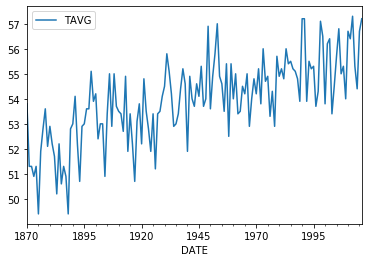

In [21]:
# Plot average temperatures
data.plot()
plt.show()

In [23]:
# Compute and print ADF p-value
result = adfuller(data['TAVG'])
print("The p-value for the ADF test is ", result[1])

The p-value for the ADF test is  0.583293898787111


The data seems to follow a random walk with drift.

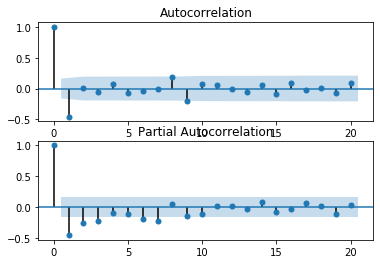

In [24]:
# Take first difference of the temperature Series
chg_temp = data.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

There is no clear pattern in the ACF and PACF except the negative lag-1 autocorrelation in the ACF.

In [25]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARMA(chg_temp, order=(1, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARMA(chg_temp, order=(2, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARMA(chg_temp, order=(1,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

C:\Users\john\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


The AIC for an AR(1) is:  510.53468983139106
The AIC for an AR(2) is:  501.92741231602287


C:\Users\john\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\john\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


The AIC for an ARMA(1,1) is:  469.07291134830234


The ARMA(1,1) has the lowest AIC values among the three models.

C:\Users\john\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\john\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


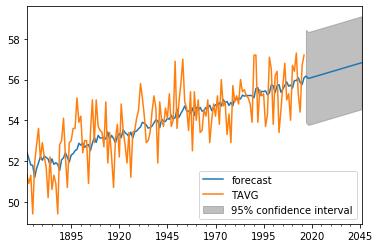

In [26]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(data, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()

According to the model, the temperature is expected to be about 0.6 degrees higher in 30 years (almost entirely due to the trend), but the 95% confidence interval around that is over 5 degrees.